---
# 💼 Attrition in an Organization || Why Workers Quit?

---

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

> 1. Expensive in terms of both money and time to train new employees.
> 1. Loss of experienced employees
> 1. Impact in productivity
> 1. Impact profit

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

------
## 📌 Business questions to brainstorm:
---
> 1. What factors are contributing more to employee attrition?
> 1. What type of measures should the company take in order to retain their employees?
> 1. What business value does the model bring?
> 1. Will the model save lots of money?
> 1. Which business unit faces the attrition problem?


### <b>Business Goal</b>
In the age of the Great Resignation, employee retention strategies have become a critical area of focus for many organizations. There are often a variety of reasons why employees leave an organization that vary from industry to industry. In this case study, I will examine some of the commonalities between former employees and identify key drivers of attrition to assist the HR Department strengthen their retention strategies and proactively reduce their attrition rates.  

### <b>Data Overview</b>
In this notebook, I will analyze IBM's on HR Analytics. The data consists of nearly 1,500 current and former employees with information related to their job satisfaction, work life balance, tenure, experience, salary, and demographic data. Below is a brief overview and summary statistics of the data.

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Importing libraries

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression

# Load data

In [64]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<Axes: xlabel='count', ylabel='Attrition'>

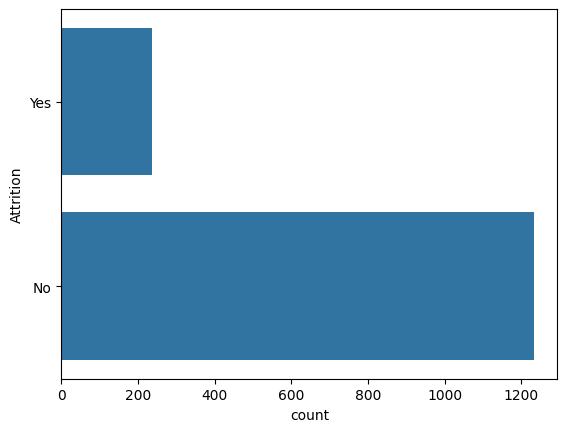

In [65]:
sns.countplot(df['Attrition'])

---
# 📊 Exploratory Data Analysis

- Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
    - Univariate analysis
        > - Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
        > - Categorical variable : Bar chart showing frequency in each category
    - Bivariate analysis
        > - Continous & Continous : Scatter plots to know how continous variables interact with each other
        > - Categorical & categorical : Stacked column chart to show how the frequencies are spread between two
        > - categorical variables
        > - Categorical & Continous : Boxplots charts
- Detect outliers

In [66]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# First look

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [68]:
df.shape

(1470, 35)

In [69]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [70]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [71]:
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() <= 10:
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Education : [2 1 4 3 5]
EmployeeCount : [1]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StandardHours : [80]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]


In [72]:
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 10:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
DistanceFromHome : Minimum: 1, Maximum: 29
EmployeeNumber : Minimum: 1, Maximum: 2068
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
PercentSalaryHike : Minimum: 11, Maximum: 25
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40
YearsInCurrentRole : Minimum: 0, Maximum: 18
YearsSinceLastPromotion : Minimum: 0, Maximum: 15
YearsWithCurrManager : Minimum: 0, Maximum: 17


We notice that '`EmployeeCount`', '`Over18`', '`StandardHours`' have only one unique values and '`EmployeeNumber`' has `1470` unique values.
This features aren't useful for us, So we are going to drop those columns.

In [73]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [74]:
for column in df.columns:
    if df[column].dtype == object:
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

In [75]:
df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


In [76]:
df.duplicated().sum()

0

In [77]:
df.shape

(1470, 31)

In [78]:
numeric_columns = list(df.select_dtypes(include=np.number).columns)
categorical_columns = list(df.select_dtypes(include="object").columns)

In [79]:
df[numeric_columns].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [80]:
df[categorical_columns].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [81]:
df['Attrition'].value_counts()
#df['Attrition'].value_counts(normalize=True)*100

,count
Attrition,
No,1233
Yes,237


Overall, around 16% of employees left the company.

In [82]:
plot_df2=df[df.Attrition=='Yes']
plot_df2['Department'].value_counts(normalize=True)

,proportion
Department,
Research & Development,0.561181
Sales,0.388186
Human Resources,0.050633


Among former employees, over half worked in Research & Development, while only 5% were from Human Resources.

In [83]:
df.groupby(['Gender','Department'])['Attrition'].value_counts()
#df.groupby(['Gender','Department'])['Attrition'].value_counts(normalize=True)

Gender  Department              Attrition
Female  Human Resources         No            14
                                Yes            6
        Research & Development  No           336
                                Yes           43
        Sales                   No           151
                                Yes           38
Male    Human Resources         No            37
                                Yes            6
        Research & Development  No           492
                                Yes           90
        Sales                   No           203
                                Yes           54
Name: count, dtype: int64

In [84]:
df.groupby(['Gender','Department'])['Department'].value_counts()

Gender  Department            
Female  Human Resources            20
        Research & Development    379
        Sales                     189
Male    Human Resources            43
        Research & Development    582
        Sales                     257
Name: count, dtype: int64

Women in Human Resources experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company. For men, the highest proportion of turnover occurred in the Sales department.

In [85]:
df.groupby(['WorkLifeBalance','Gender'])['Attrition'].value_counts(normalize=True)*100

WorkLifeBalance  Gender  Attrition
1                Female  No           76.666667
                         Yes          23.333333
                 Male    No           64.000000
                         Yes          36.000000
2                Female  No           86.029412
                         Yes          13.970588
                 Male    No           81.250000
                         Yes          18.750000
3                Female  No           87.123288
                         Yes          12.876712
                 Male    No           84.848485
                         Yes          15.151515
4                Female  No           75.438596
                         Yes          24.561404
                 Male    No           86.458333
                         Yes          13.541667
Name: proportion, dtype: float64

Among women with the highest rated work life balance, 1 out of 4 left the company, the highest proportion among the ratings for women. For men, the highest proportion occurred in those with the lowest work life balance.

In [86]:
df.groupby(['Attrition'])['JobSatisfaction'].value_counts(normalize=True)

Attrition  JobSatisfaction
No         4                  0.330089
           3                  0.299270
           2                  0.189781
           1                  0.180860
Yes        3                  0.308017
           1                  0.278481
           4                  0.219409
           2                  0.194093
Name: proportion, dtype: float64

In [87]:
df.groupby(['Attrition','Gender'])['JobSatisfaction'].value_counts(normalize=True)

Attrition  Gender  JobSatisfaction
No         Female  3                  0.309381
                   4                  0.307385
                   1                  0.195609
                   2                  0.187625
           Male    4                  0.345628
                   3                  0.292350
                   2                  0.191257
                   1                  0.170765
Yes        Female  3                  0.298851
                   2                  0.275862
                   1                  0.241379
                   4                  0.183908
           Male    3                  0.313333
                   1                  0.300000
                   4                  0.240000
                   2                  0.146667
Name: proportion, dtype: float64

In [88]:
df.groupby(['Department', 'Gender'])['MonthlyIncome'].mean()

Department              Gender
Human Resources         Female    7264.000000
                        Male      6371.023256
Research & Development  Female    6513.691293
                        Male      6129.888316
Sales                   Female    6972.126984
                        Male      6949.645914
Name: MonthlyIncome, dtype: float64

In [89]:
df.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome'].median()


Department              Attrition  Gender
Human Resources         No         Female    6187.0
                                   Male      4323.0
                        Yes        Female    2741.5
                                   Male      2449.5
Research & Development  No         Female    4873.0
                                   Male      4509.5
                        Yes        Female    2707.0
                                   Male      2824.0
Sales                   No         Female    5736.0
                                   Male      6209.0
                        Yes        Female    4588.0
                                   Male      5680.5
Name: MonthlyIncome, dtype: float64

In [90]:
df.groupby('JobRole')['MonthlyIncome'].mean().sort_values()

,MonthlyIncome
JobRole,
Sales Representative,2626.000000
Laboratory Technician,3237.169884
Research Scientist,3239.972603
Human Resources,4235.750000
Sales Executive,6924.279141
Manufacturing Director,7295.137931
Healthcare Representative,7528.763359
Research Director,16033.550000
Manager,17181.676471


In [91]:
df['JobLevel']=pd.Categorical(df['JobLevel']).rename_categories(  ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

In [92]:
df['JobLevel']

,JobLevel
0,Mid level
1,Mid level
2,Entry level
3,Entry level
4,Entry level
...,...
1465,Mid level
1466,Senior
1467,Mid level
1468,Mid level


Based on the scatterplot above, monthly income is positively correlated with total number of years worked and there is strong association between an employee's earnings and their job level.

---
## 📉 Data Visualisation

In [93]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

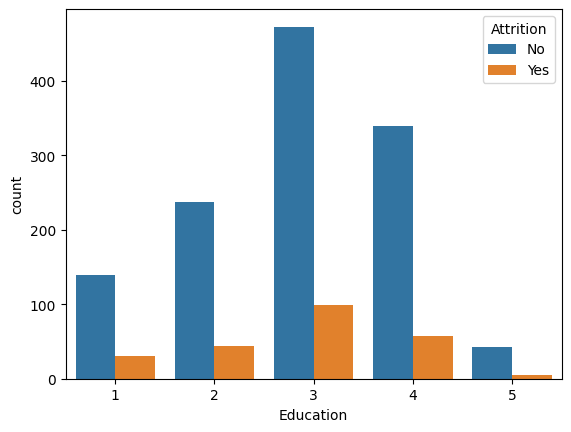

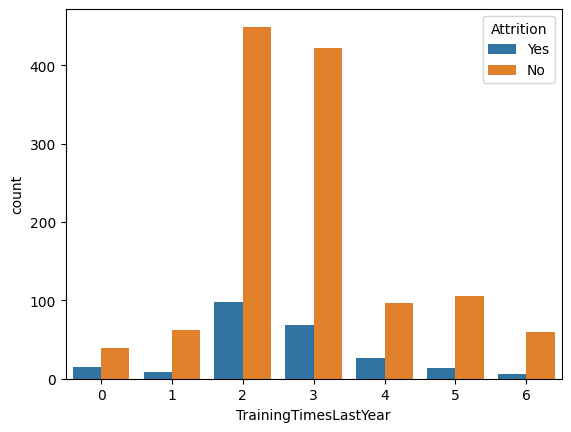

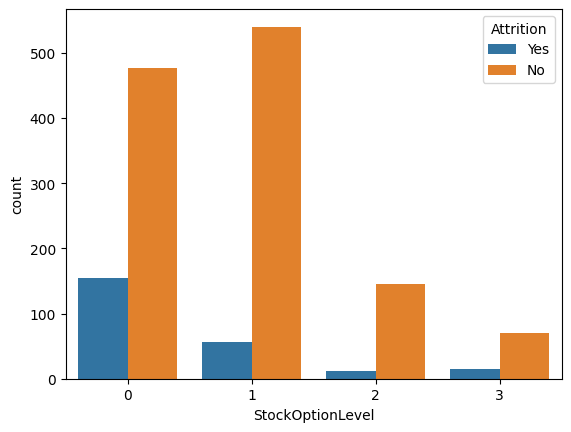

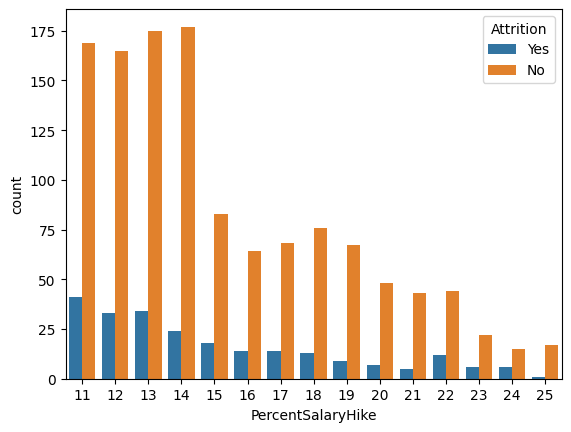

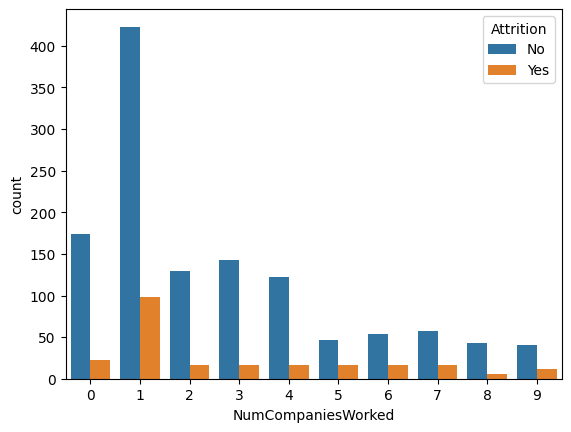

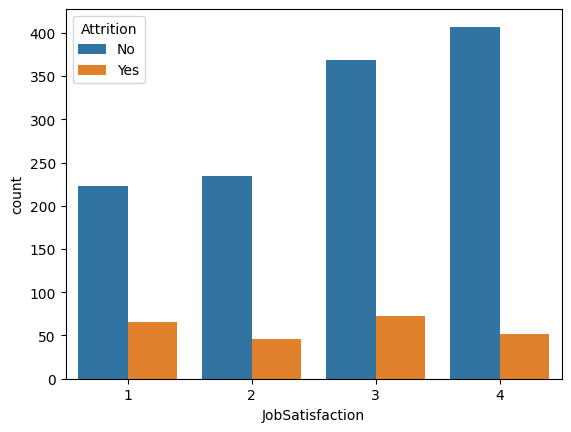

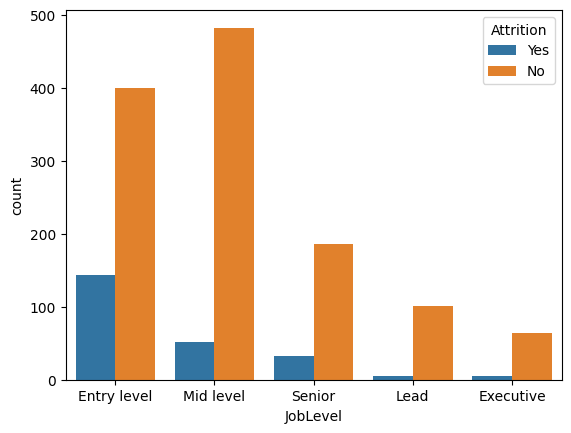

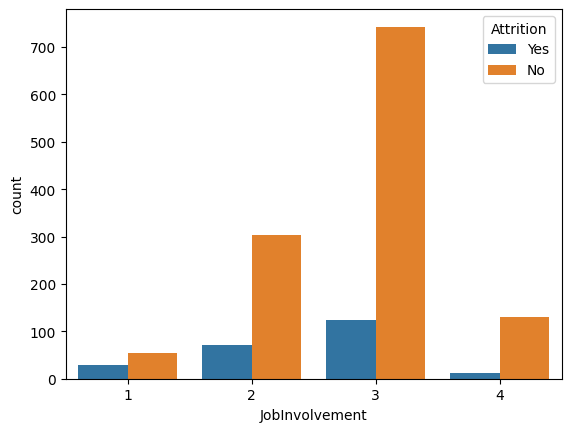

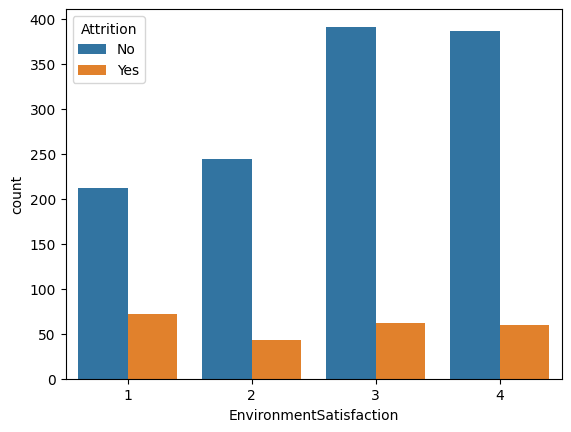

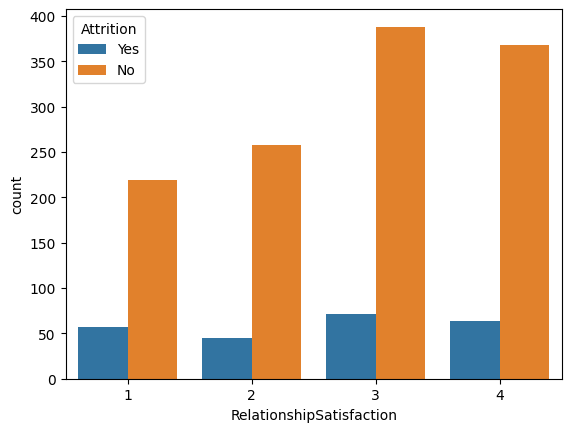

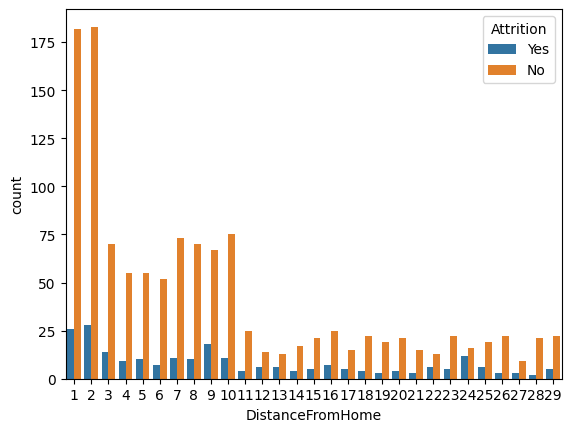

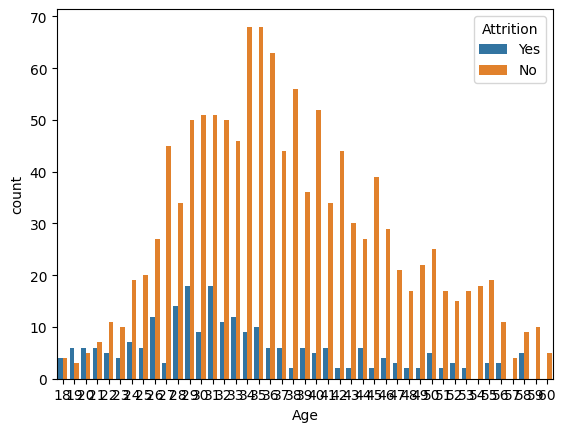

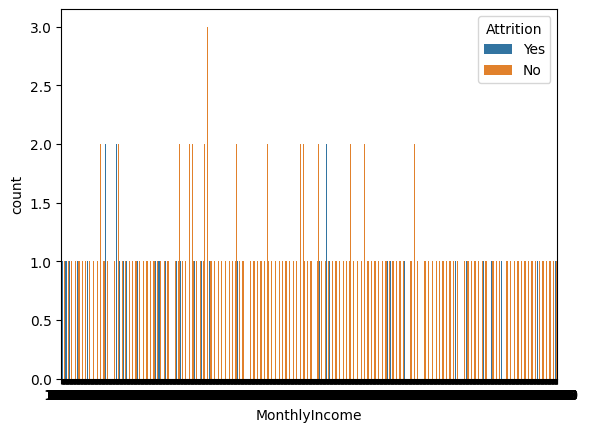

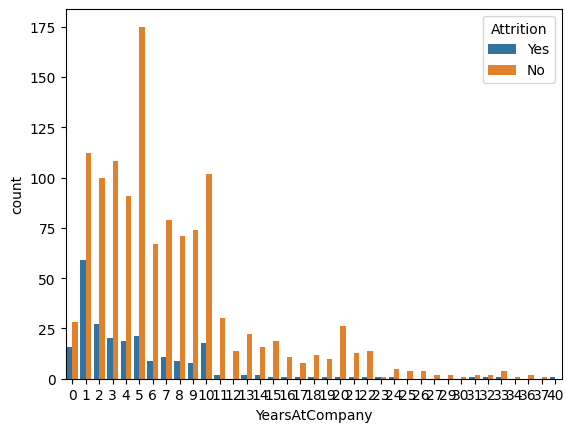

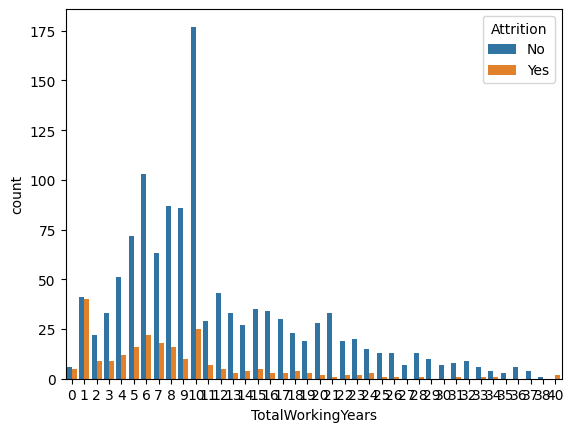

In [94]:
def plot_histogram(df,col):
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.show()

columns=['Education','TrainingTimesLastYear','StockOptionLevel','PercentSalaryHike','NumCompaniesWorked','JobSatisfaction','JobLevel',
'JobInvolvement','EnvironmentSatisfaction','RelationshipSatisfaction','DistanceFromHome','Age','MonthlyIncome','YearsAtCompany','TotalWorkingYears']


for col in columns:
    plot_histogram(df, col)

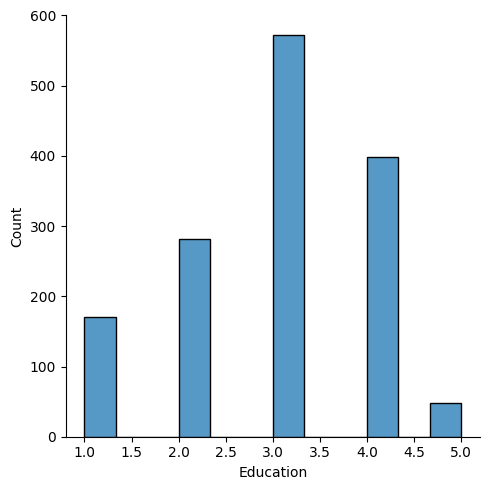

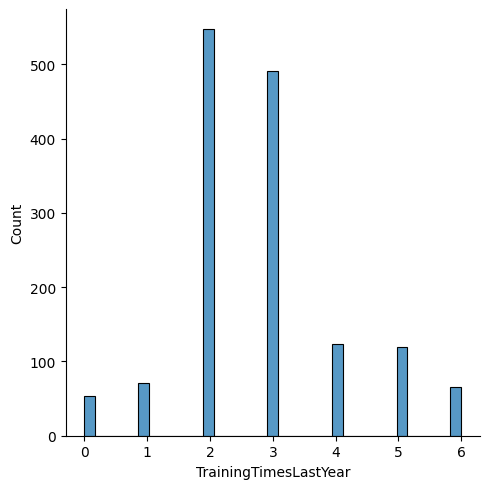

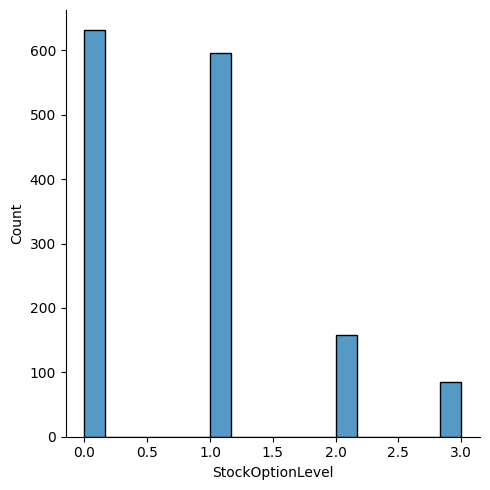

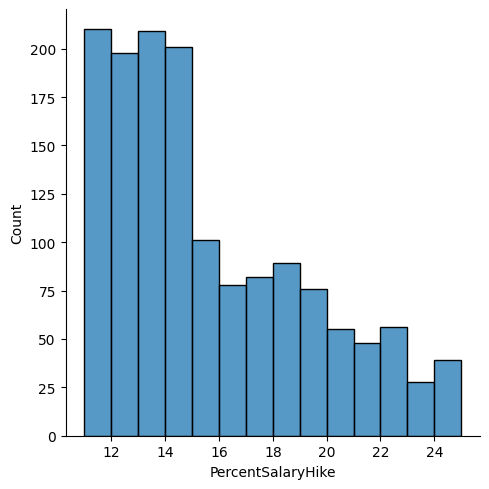

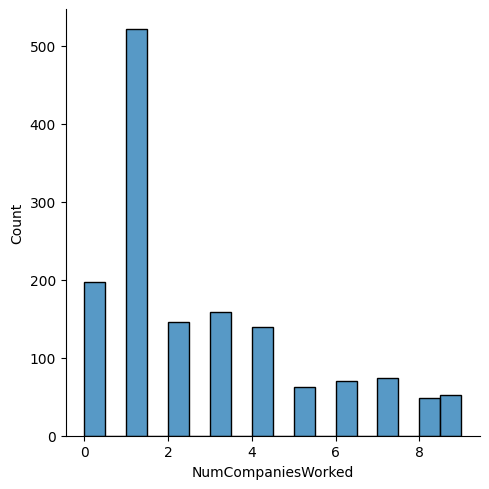

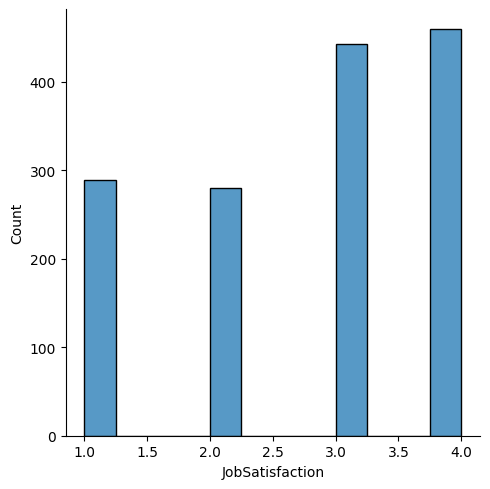

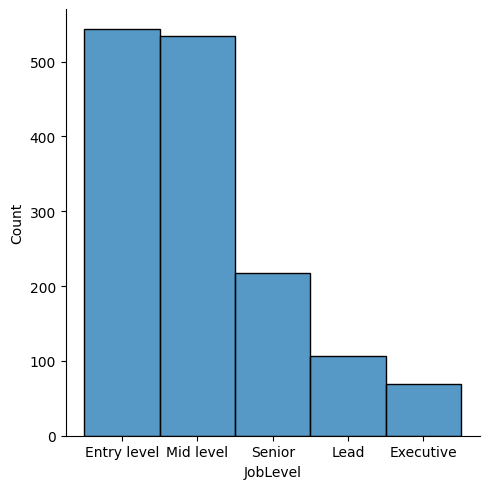

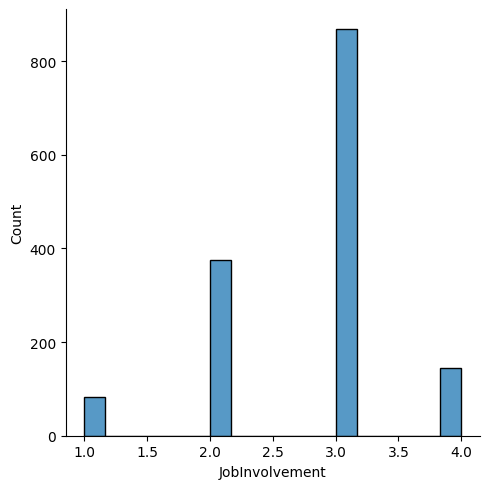

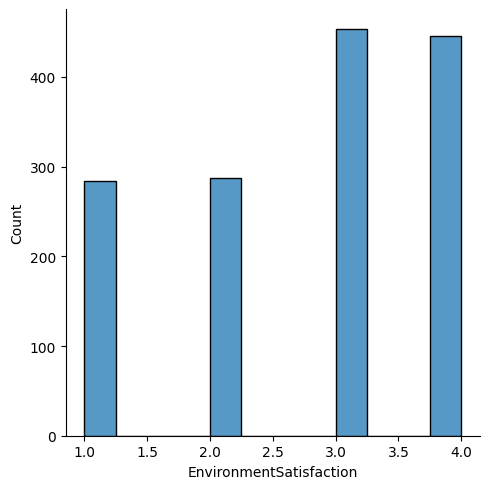

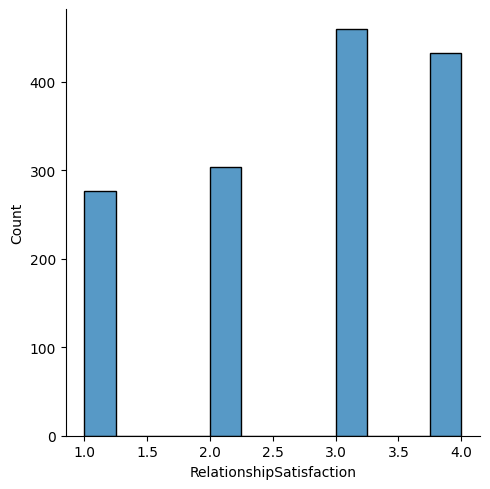

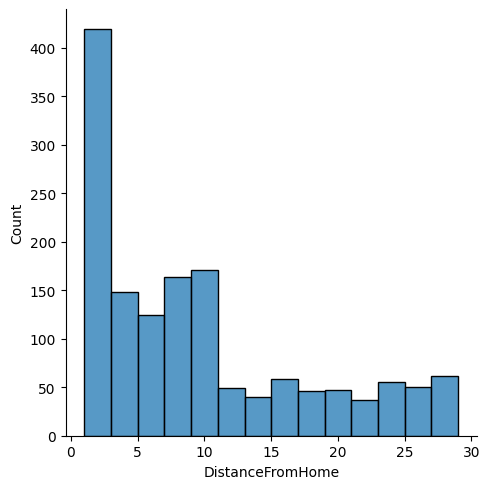

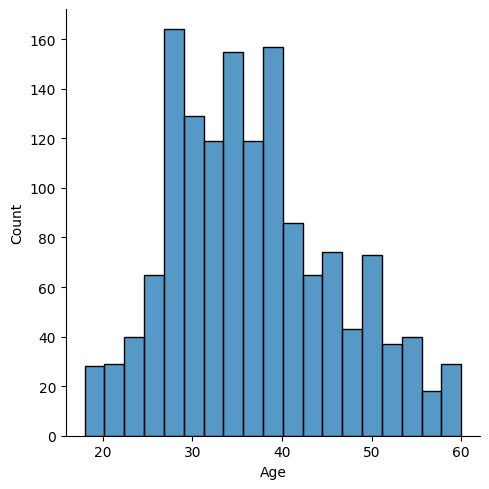

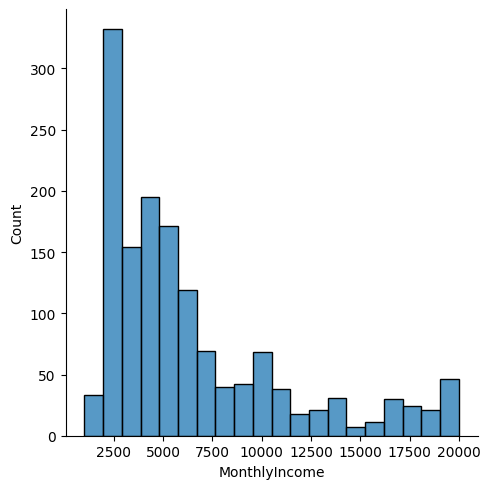

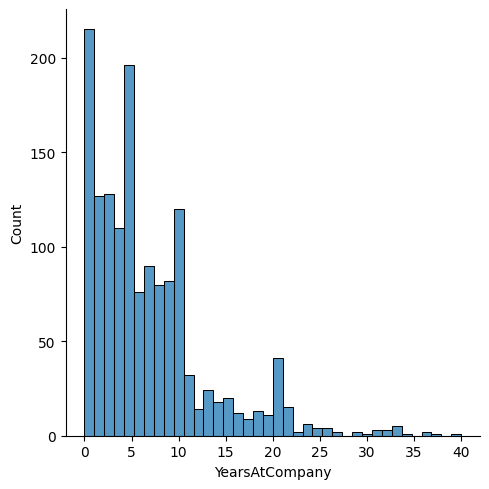

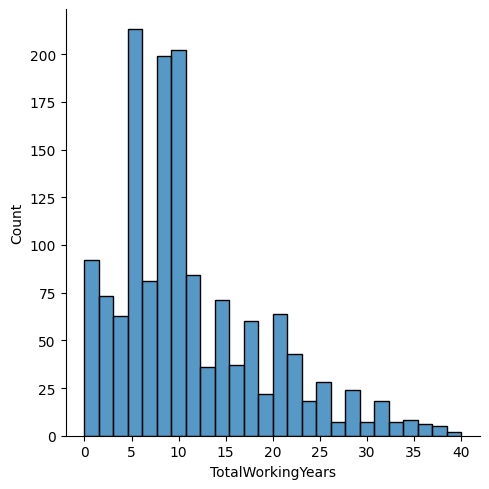

In [95]:
def plot_histogram(df,col,bycol):
    sns.displot(df, x=col)
    plt.show()

columns=['Education','TrainingTimesLastYear','StockOptionLevel','PercentSalaryHike','NumCompaniesWorked','JobSatisfaction','JobLevel',
'JobInvolvement','EnvironmentSatisfaction','RelationshipSatisfaction','DistanceFromHome','Age','MonthlyIncome','YearsAtCompany','TotalWorkingYears']


for col in columns:
    plot_histogram(df, col, "Attrition")

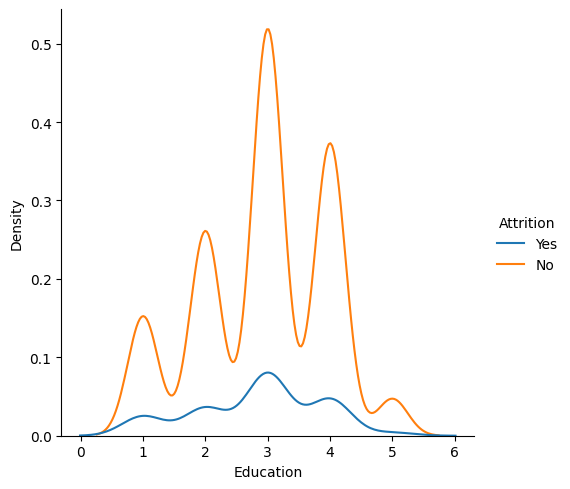

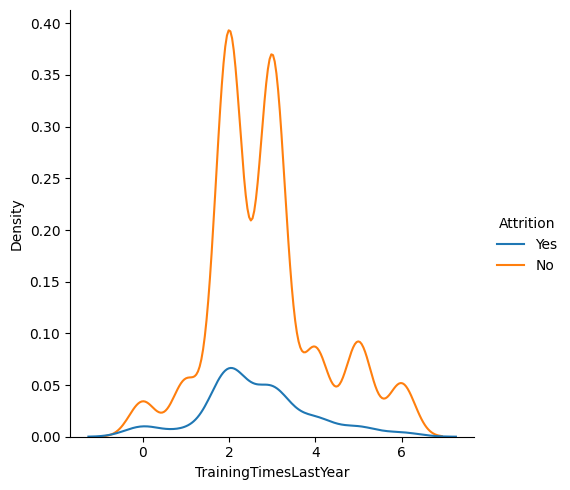

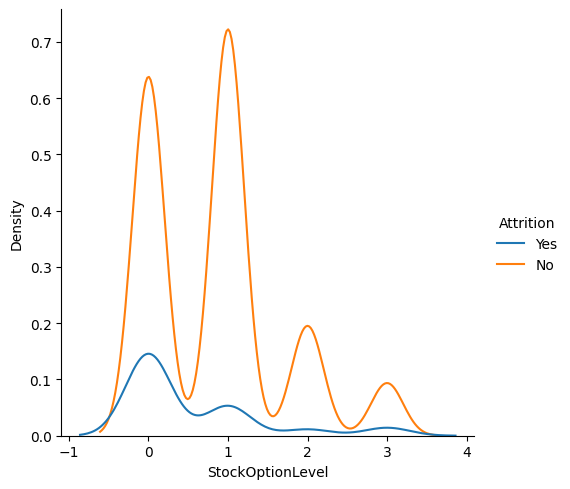

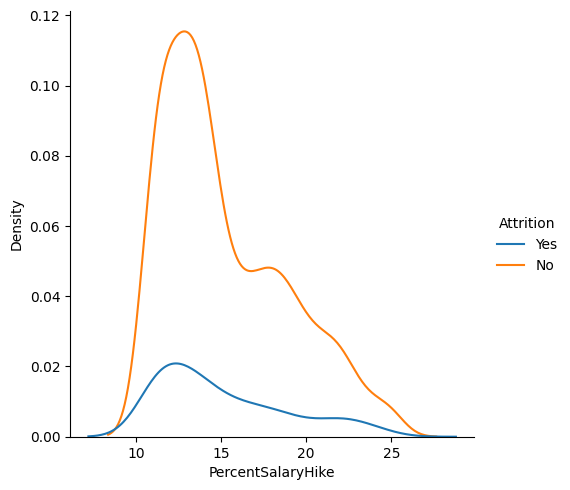

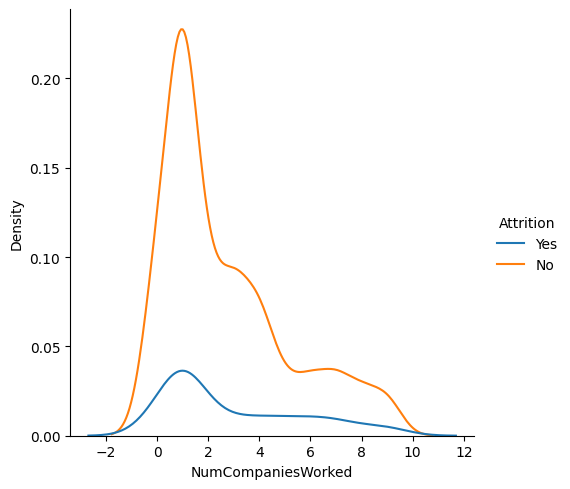

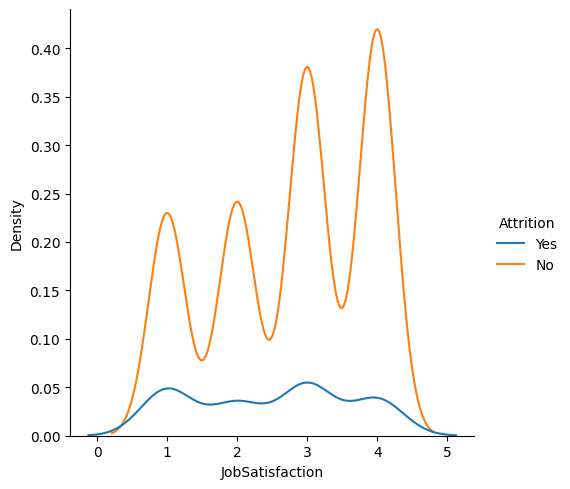

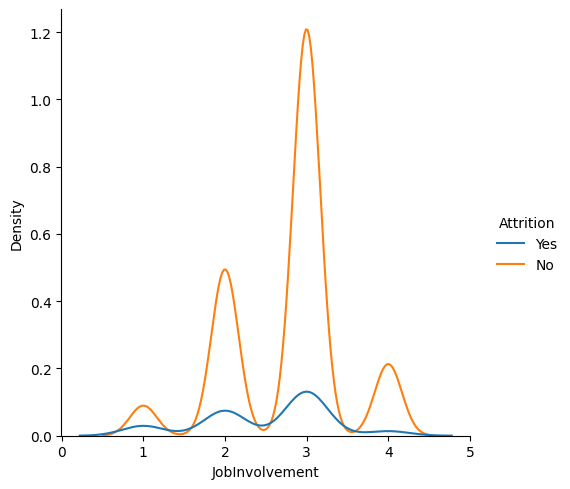

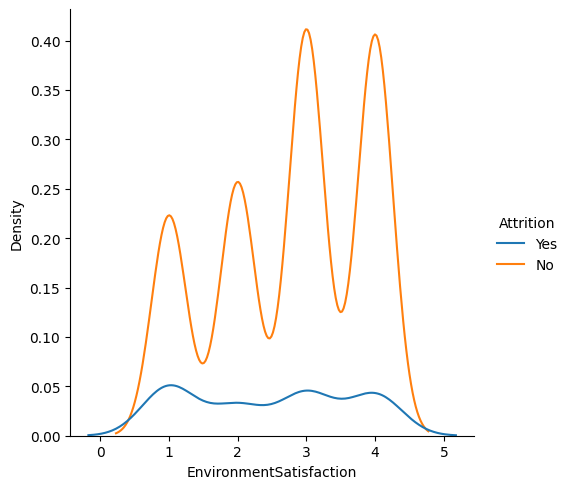

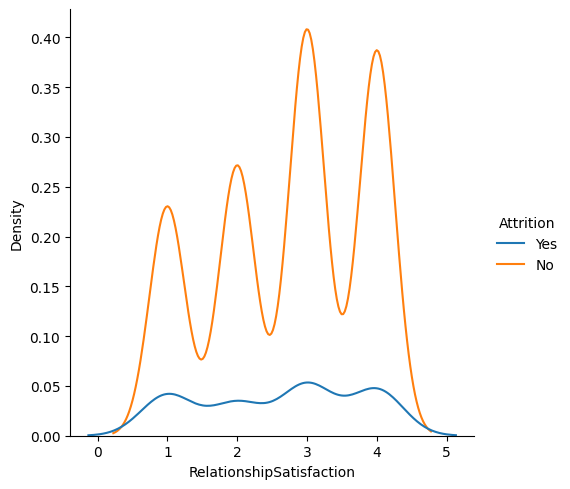

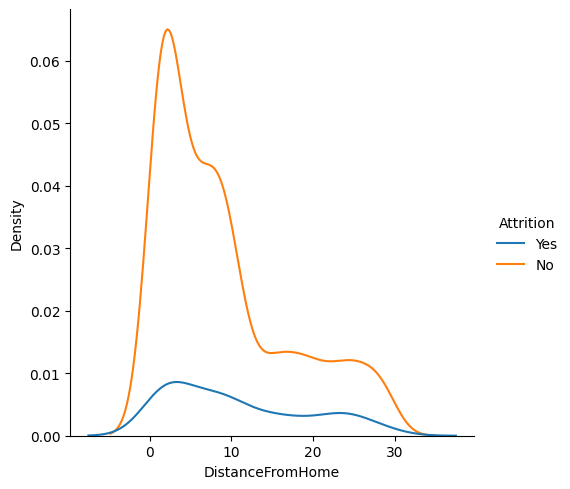

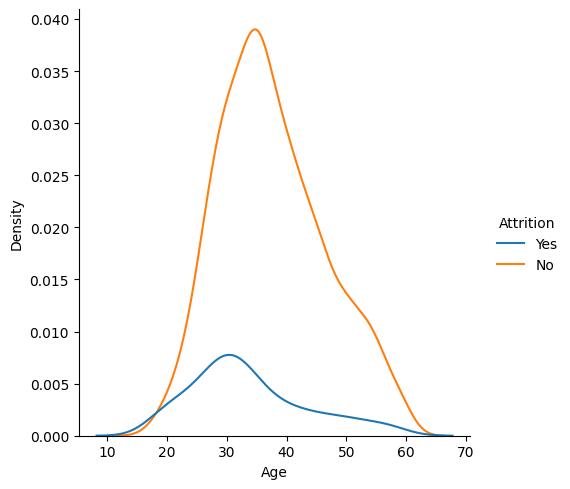

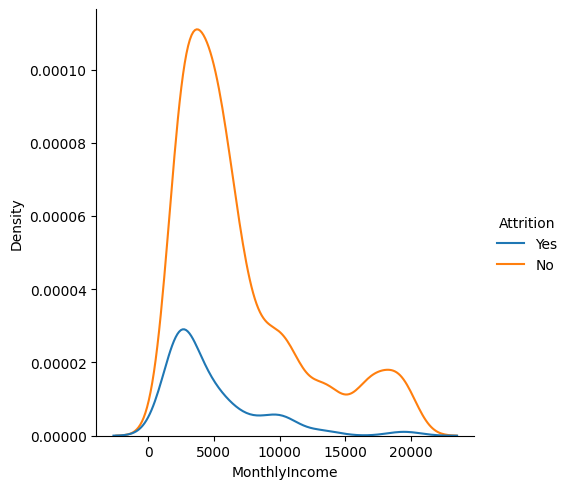

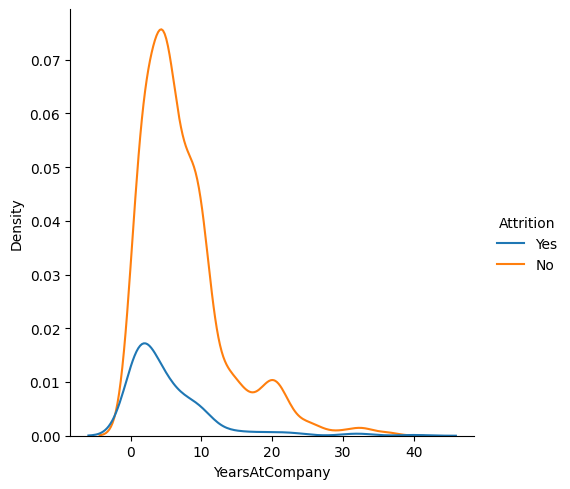

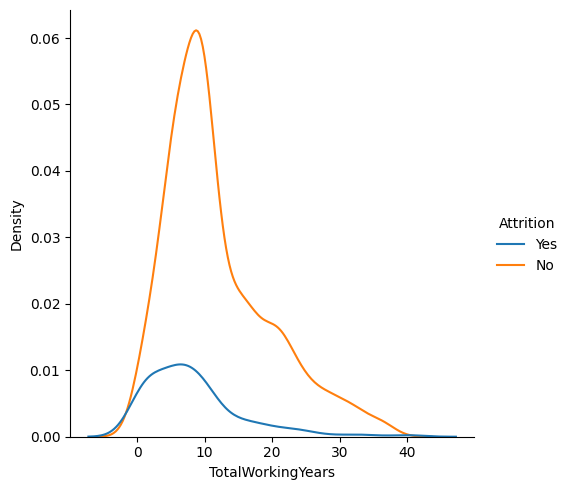

In [96]:
def plot_histogram(df,col,bycol):
    sns.displot(df, x=col, hue="Attrition",kind="kde")
    plt.show()

columns=['Education','TrainingTimesLastYear','StockOptionLevel','PercentSalaryHike','NumCompaniesWorked','JobSatisfaction',
'JobInvolvement','EnvironmentSatisfaction','RelationshipSatisfaction','DistanceFromHome','Age','MonthlyIncome','YearsAtCompany','TotalWorkingYears']

for col in columns:
    plot_histogram(df, col, "Attrition")

## 📌 Note

It seems that `EnvironmentSatisfaction`, `JobSatisfaction`, `PerformanceRating`, and `RelationshipSatisfaction` features don't have big impact on the detrmination of `Attrition` of employees.

***

## 📝 **Conclusions:**

***
- The workers with low `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit there jobs.
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

***

In [97]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

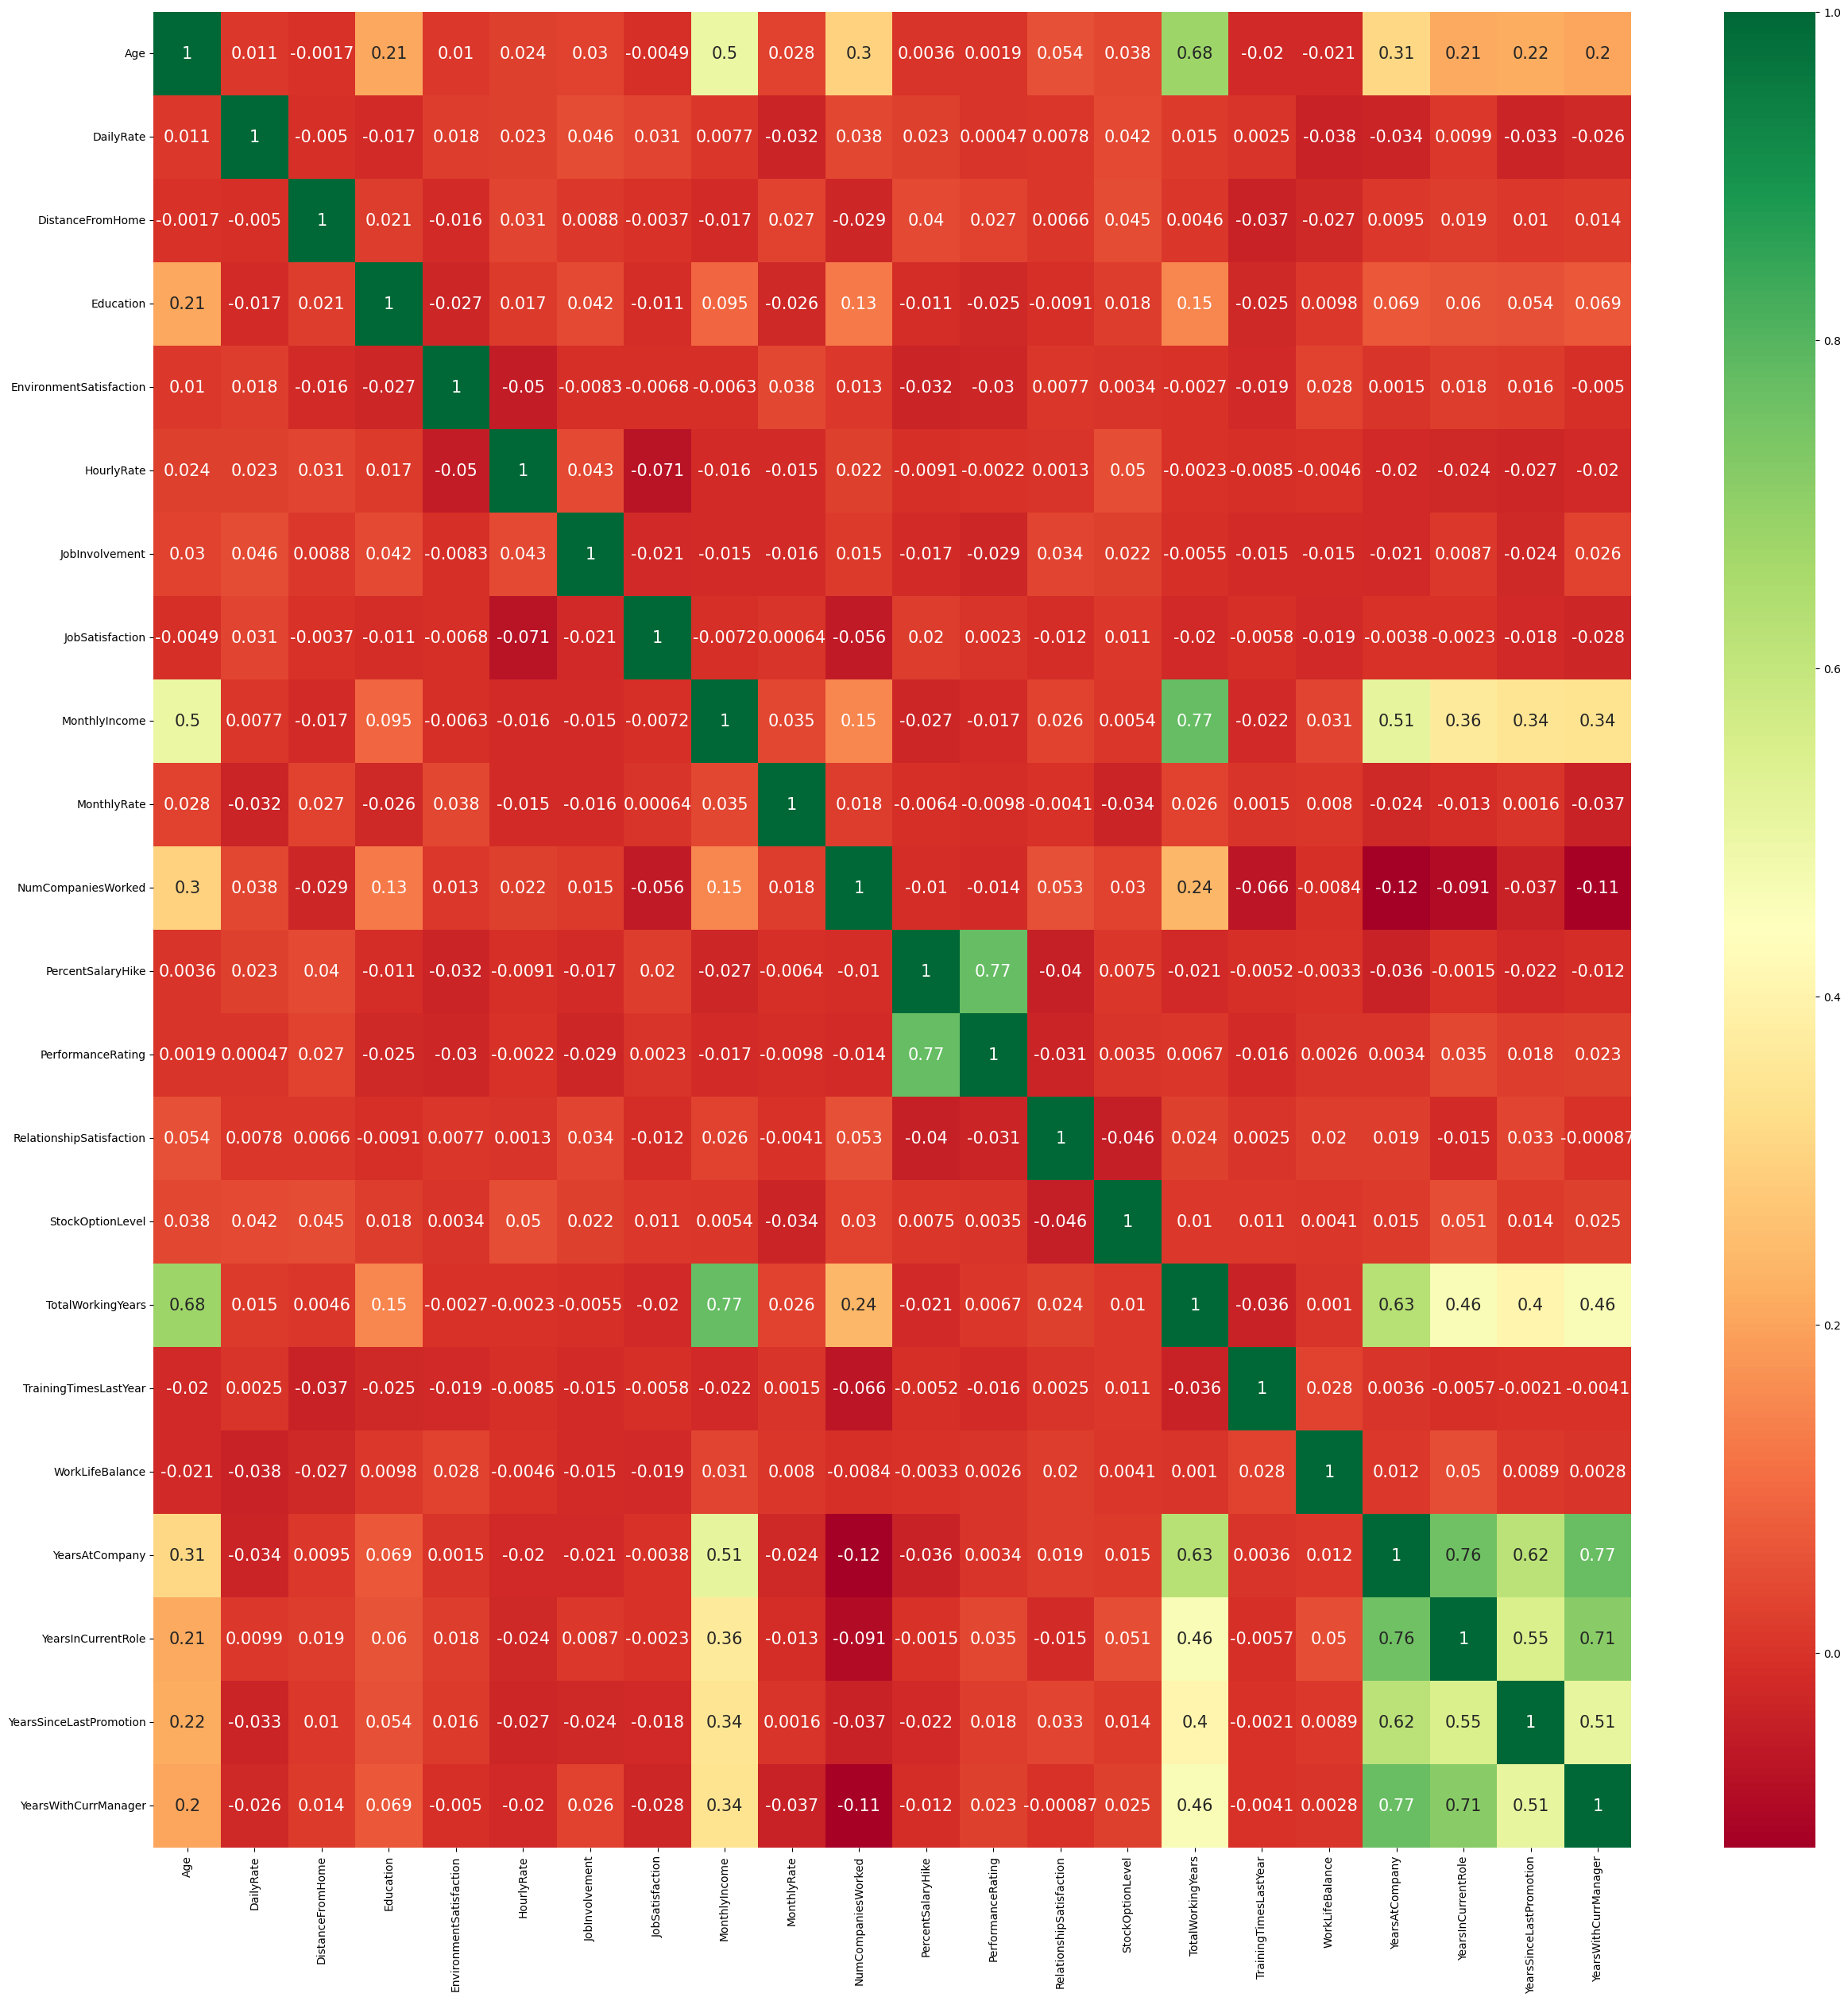

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure only numeric columns are considered for correlation
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()


## 📝 **Analysis of correlation results (sample analysis):**
- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.
- Marital status and stock option level are negatively correlated

Confirming our findings in the scatterplot above, `MonthlyIncome` has a strong positive correlation to `TotalWorkingYears` of 0.77. Additionally, `YearsAtCompany` has a strong positive association with `YearsWithCurrManager` (correlation = 0.77), as well as with `YearsInCurrentRole` (correlation = 0.76). There are no variables with a correlation above 0.8, indicating a potential collinearity issue.

In [99]:
#df.skew().sort_values(ascending=False)
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate skewness and sort in descending order
skew_values = numeric_df.skew().sort_values(ascending=False)

print(skew_values)



YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
StockOptionLevel            0.968980
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
Age                         0.413286
MonthlyRate                 0.018578
DailyRate                  -0.003519
HourlyRate                 -0.032311
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobInvolvement             -0.498419
WorkLifeBalance            -0.552480
dtype: float64


<ipython-input-100-4e008745316c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = categorical_columns[i], palette="rocket")


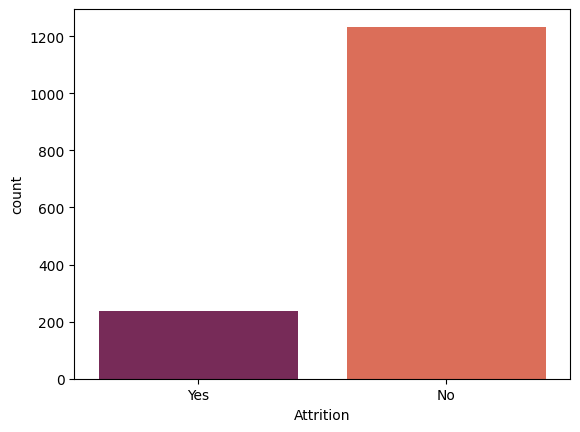

<ipython-input-100-4e008745316c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = categorical_columns[i], palette="rocket")


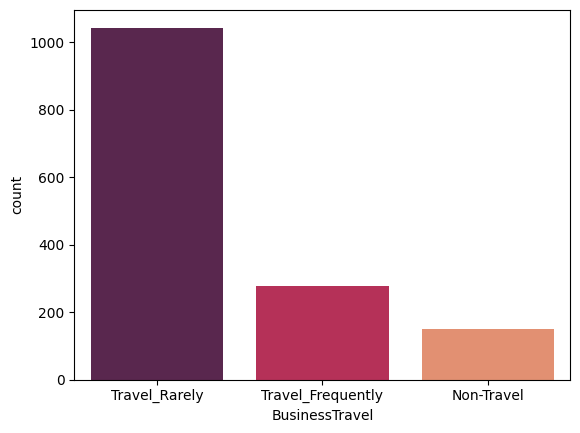

<ipython-input-100-4e008745316c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = categorical_columns[i], palette="rocket")


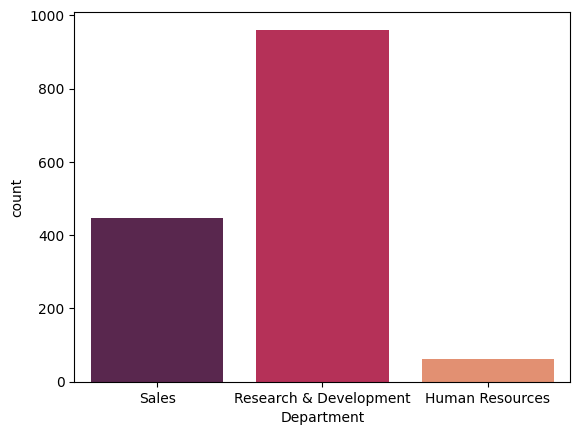

<ipython-input-100-4e008745316c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = categorical_columns[i], palette="rocket")


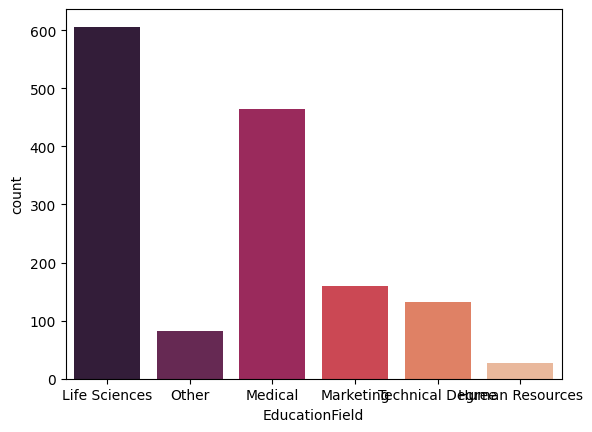

<ipython-input-100-4e008745316c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = categorical_columns[i], palette="rocket")


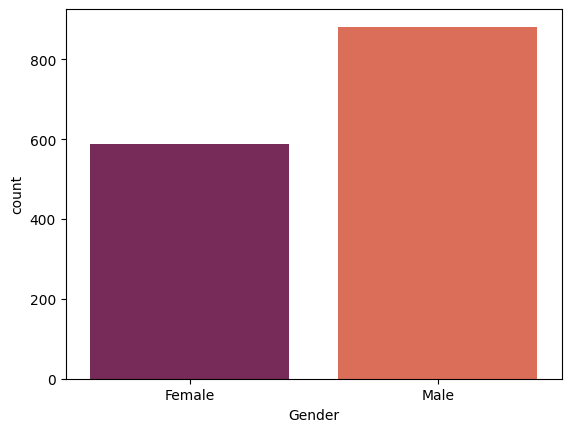

<ipython-input-100-4e008745316c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = categorical_columns[i], palette="rocket")


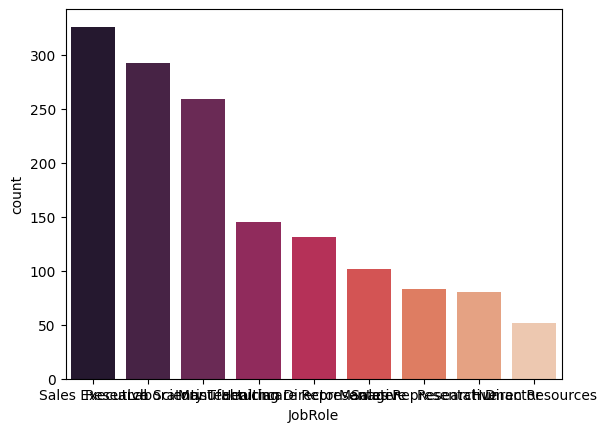

<ipython-input-100-4e008745316c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = categorical_columns[i], palette="rocket")


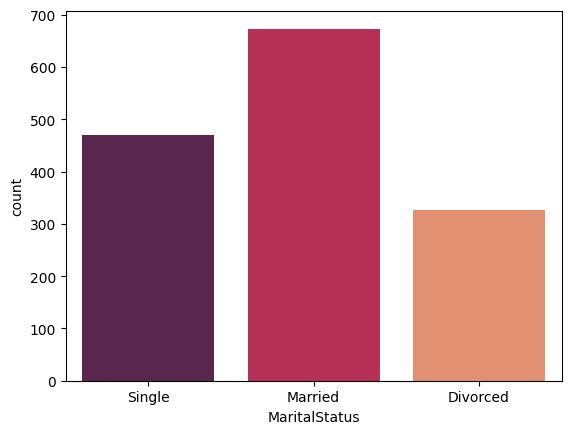

<ipython-input-100-4e008745316c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = categorical_columns[i], palette="rocket")


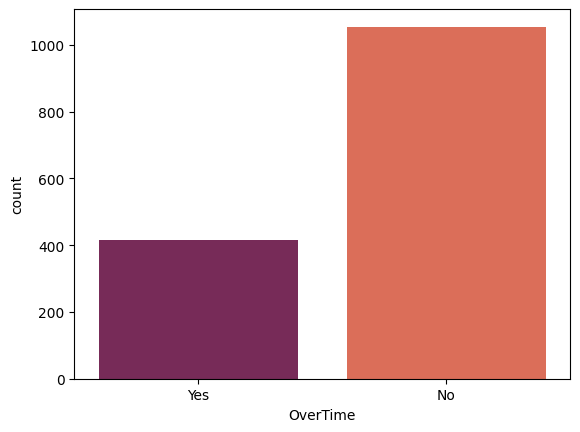

In [100]:
for i in range(len(categorical_columns)):
    sns.countplot(data = df, x = categorical_columns[i], palette="rocket")
    plt.show()


* ``Over18`` only have one Value (No Wonder :) )
* `Attrition` is heavily unbalanced
* Most of the employees travel rarely
* Most of the employees work overtimes
* There are more females than males

* There are employees which work for over 10 years without a promotion which is quite strange
* The performance rating of the employees isn't the best with ~ 3.0 as a median

# Bivariate plots

There are some obvious correlations among the numerical columns:

* High correlation between Age and JobLevel, MonthlyIncome and TotalWorkingYears
* High correlation between JobLevel and MonthlyIncome
* High correlation between TotalWorkingYears and YearsSinceLastPromotion -> The longer you are working, the higher is the probability that you reached your "limit" in terms of promotion

* Nearly half of the Sales Representatives went from the company away
* Most of the people were traveling rarely and Sales is the department with the highest attrition (but also with the most employees overall)

In [101]:
df.groupby("Gender")["YearsSinceLastPromotion"].mean()

,YearsSinceLastPromotion
Gender,
Female,2.294218
Male,2.116780


In [102]:
df.groupby("Gender")["PerformanceRating"].mean()

,PerformanceRating
Gender,
Female,3.159864
Male,3.149660


Females are waiting a bit longer for a promotion than men, although having a better performance rating

# Data Preprocessing

---
# 🔨 Data Processing

## Drop unnecessary columns

Those columns have only one value

In [103]:
X = df.loc[:, df.columns != "Attrition"].copy()
#X=df.loc[:, df.columns != 'Attrition']
y = df.loc[:, "Attrition"].copy()

## Label Encoding for Target `Attrition`

In [104]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.DataFrame(y, index=df.index, columns=["Attrition"])

In [105]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [106]:
#y=df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)

In [107]:
categorical_cols_features = list(X.select_dtypes(include="object").columns)

In [108]:
categorical_cols_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

## <b><span style='color:#68A19B'>I.</span>  Encode Categorical Columns</b>

In [109]:

X=pd.get_dummies(X, drop_first=True)
#X.columns=X.columns.str.replace(' ', '')
X.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,4,5993,19479,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,5130,24907,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,3,2090,2396,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,3,2909,23159,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,2,3468,16632,...,True,False,False,False,False,False,False,True,False,False


## <b><span style='color:#68A19B'>II.</span> Create Training and Test Sets</b>

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [111]:
print("Train Shape:", X_train.shape, y_train.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

Train Shape: (1102, 47) (1102, 1)
Test set Shape: (368, 47) (368, 1)


In [112]:
y_train.value_counts()

,count
Attrition,
0,913
1,189


In [113]:
y_test.value_counts()

,count
Attrition,
0,320
1,48


## <b><span style='color:#68A19B'>III.</span> Scale Features</b>

In [114]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,-0.852159,-0.508455,-0.285906,0.094018,1.190392,-0.374600,0.393923,-1.569331,-0.917685,0.703724,...,2.170218,-0.268299,-0.317646,-0.248308,-0.509341,-0.523439,-0.262422,-0.933257,1.500246,-0.642511
1,-0.093088,0.209318,-1.017204,1.053349,-0.641748,0.309668,0.393923,0.251093,0.091131,0.993959,...,-0.460783,-0.268299,-0.317646,-0.248308,-0.509341,1.910442,-0.262422,-0.933257,1.500246,-0.642511
2,-0.309965,1.295810,-0.773438,0.094018,1.190392,0.700678,-2.415809,-1.569331,-0.345252,0.212309,...,-0.460783,-0.268299,-0.317646,-0.248308,-0.509341,1.910442,-0.262422,-0.933257,1.500246,-0.642511
3,-1.069036,0.381387,-0.042139,0.094018,1.190392,-1.107744,0.393923,1.161305,-0.484062,-1.305971,...,-0.460783,-0.268299,-0.317646,-0.248308,-0.509341,1.910442,-0.262422,-0.933257,1.500246,-0.642511
4,-0.526843,0.319933,0.079744,0.094018,1.190392,-0.570105,0.393923,1.161305,-0.210050,1.029974,...,-0.460783,-0.268299,-0.317646,-0.248308,-0.509341,1.910442,-0.262422,-0.933257,1.500246,-0.642511


# 🤖 Applying machine learning algorithms

## ✔️ Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred=lr_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
y_pred_label=label_encoder.inverse_transform(y_pred)
y_pred_label

array(['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 

In [117]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[311,   9],
       [ 26,  22]])

<Axes: >

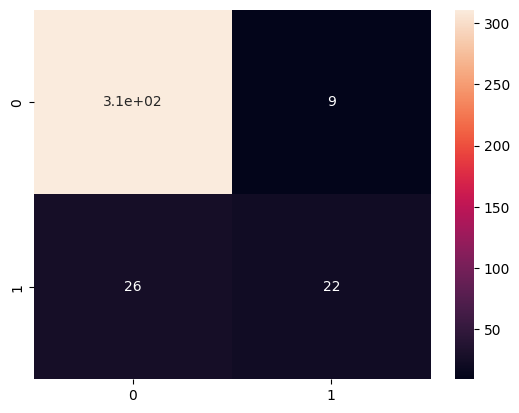

In [118]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True)


In [119]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.49%


In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       320
           1       0.71      0.46      0.56        48

    accuracy                           0.90       368
   macro avg       0.82      0.72      0.75       368
weighted avg       0.90      0.90      0.90       368

